**NAMA  : MUHAMMAD REZA ADI NUGRAHA**

**NIM   : 1301204078**

**KELAS : IF-44-05**
________________________________________________________________________________________________________________________________________________________________

**REFERENSI**


*   https://www.kaggle.com/code/tanmay111999/clustering-pca-k-means-dbscan-hierarchical/notebook#Dataset-Information
*   https://seaborn.pydata.org/api.html


# **[1] IKHTISAR DATA**

HELP International telah berhasil mengumpulkan sekitar $10 juta. Sekarang CEO perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. 

Jadi, CEO harus membuat keputusan untuk memilih negara-negara yang paling membutuhkan bantuan. 

Tujuan dalam problem ini adalah untuk mengkategorikan negara menggunakan beberapa faktor sosial-ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan.




*   child_mort = Death of children under 5 years of age per 1000 live births
*   exports = Exports of goods and services per capita. Given as %age of the GDP per capita
*   health = Total health spending per capita. Given as %age of GDP per capita

*   imports = Imports of goods and services per capita. Given as %age of the GDP per capita   
*   income = Net income per person
*   inflation = The measurement of the annual growth rate of the Total GDP
*   life_expec = The average number of years a new born child would live if the current mortality patterns are to remain the same
*   total_fer = The number of children that would be born to each woman if the current age-fertility rates remain the same.
*   gdpp = The GDP per capita. Calculated as the Total GDP divided by the total population.





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None

## **Dataset Secara Umum**

In [ ]:
# Membaca dataset
df = pd.read_csv("/content/Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
# Ukuran Tabel, Nama Kolom, dan Jumlah NULL
print("Ukuran Tabel : ", df.shape)
print("Jumlah NULL  : ", df.isnull().sum().sum())

Ukuran Tabel :  (167, 10)
Jumlah NULL  :  0


In [ ]:
# Deskripsi Statistik Data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [ ]:
# Memisahkan Kolom Kategorikal dan Kolom Numerik
col = list(df.columns)
col.remove('country')
categorical_features = ['country']
numerical_features = [*col]
print('Kolom Kategorikal  :', *categorical_features)
print('Kolom Numerik      :', *numerical_features)

Kolom Kategorikal  : country
Kolom Numerik      : child_mort exports health imports income inflation life_expec total_fer gdpp


## **Distribusi Data**

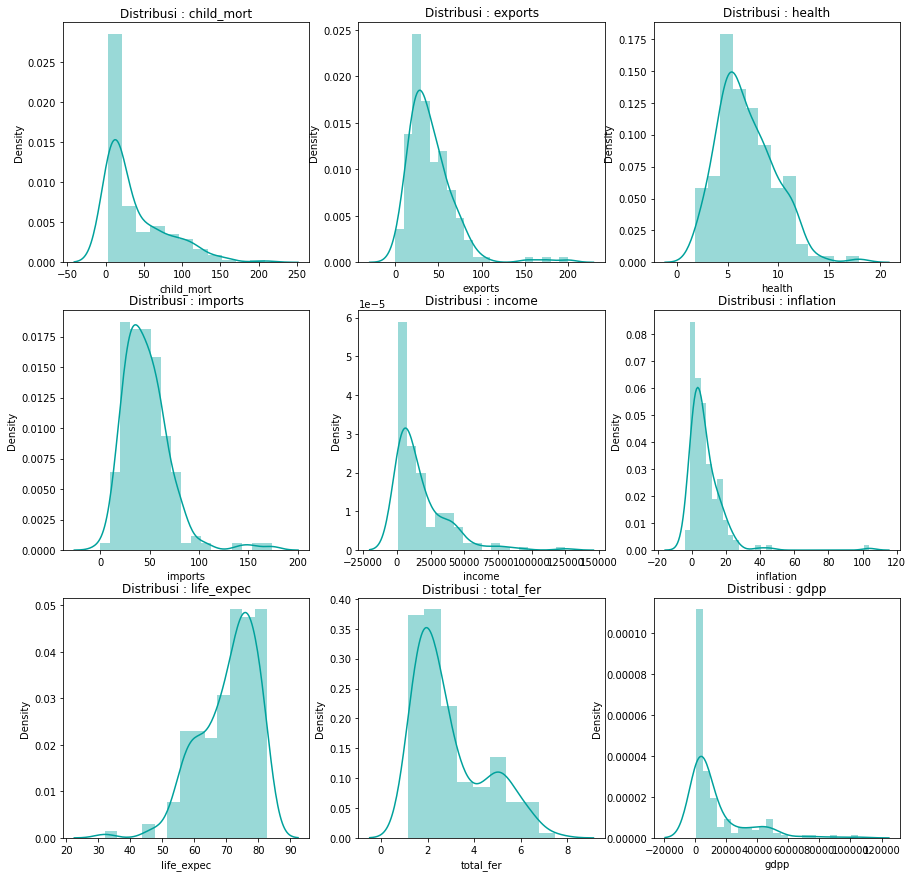

In [ ]:
# Distribusi Data setiap Kolom Numerik
colors = ['#00A19C','#C6C6C6']
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.distplot(df[numerical_features[i]],color = colors[0])
    title = 'Distribusi : ' + numerical_features[i]
    plt.title(title)
plt.show()

## **Perbandingan Faktor Tiap Negara**

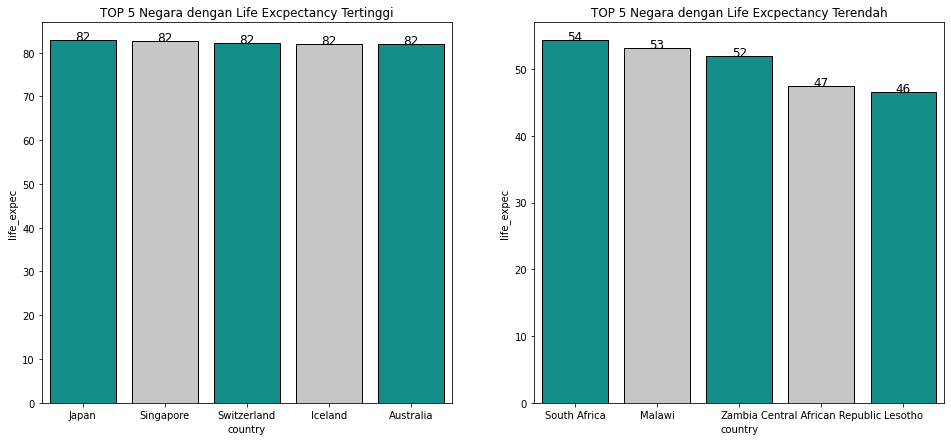

In [ ]:
# Kesehatan
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (25,7))

# Negara dengan Life Excpectancy Tertinggi
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'life_expec', data = df.sort_values(ascending = False,by = 'life_expec').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('TOP 5 Negara dengan Life Excpectancy Tertinggi')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

# Negara dengan Life Excpectancy Terendah
plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'life_expec', data = df.sort_values(ascending = False,by = 'life_expec').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('TOP 5 Negara dengan Life Excpectancy Terendah')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

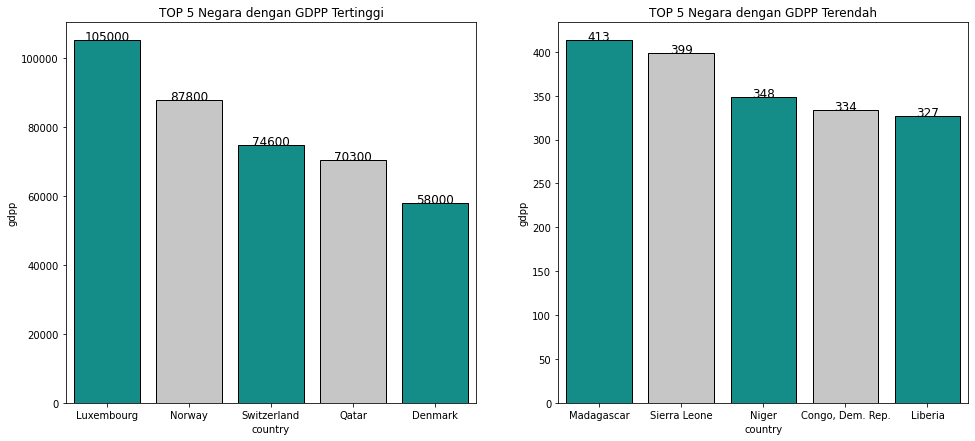

In [ ]:
# Ekonomi
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (25,7))

# Negara dengan GDPP Tertinggi
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'gdpp', data = df.sort_values(ascending = False,by = 'gdpp').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('TOP 5 Negara dengan GDPP Tertinggi')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

# Negara dengan GDPP Terendah
plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'gdpp', data = df.sort_values(ascending = False,by = 'gdpp').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('TOP 5 Negara dengan GDPP Terendah')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

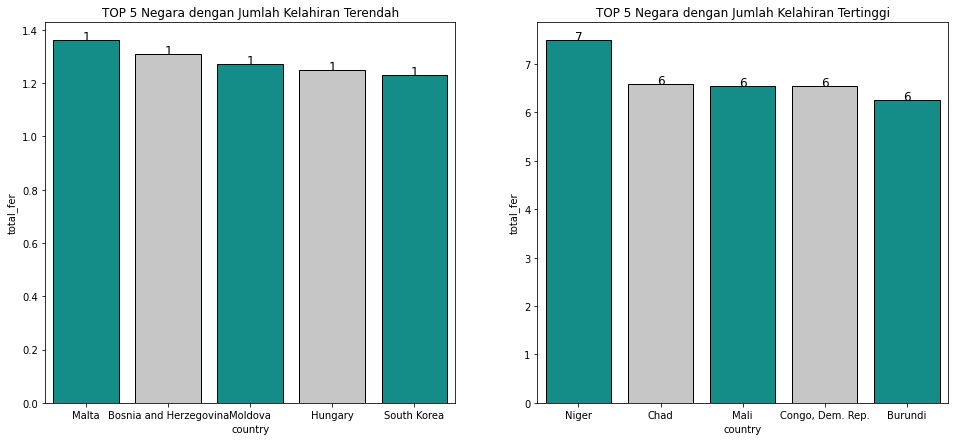

In [ ]:
# Sosial
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (25,7))

# Negara dengan Total Fer Terendah
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'total_fer', data = df.sort_values(ascending = False,by = 'total_fer').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('TOP 5 Negara dengan Jumlah Kelahiran Terendah')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
    
# Negara dengan Total Fer Tertinggi
plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'total_fer', data = df.sort_values(ascending = False,by = 'total_fer').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('TOP 5 Negara dengan Jumlah Kelahiran Tertinggi')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)



## **Korelasi Data**

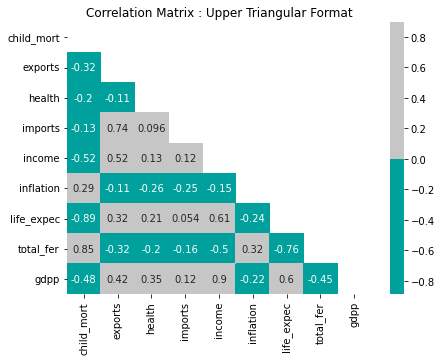

In [ ]:
# Korelasi antar Kolom
ut = np.triu(df.corr())

fig,ax = plt.subplots(nrows = 1, ncols = 1,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(df.corr(),cmap = colors,annot = True,cbar = 'True',mask = ut);
plt.title('Correlation Matrix : Upper Triangular Format');

# **[2] PRA PEMROSESAN DATA**

In [ ]:
# Drop DataFrame Kategorikal
df_final = df
df = df.drop(columns=['country'])
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## **Nilai Pencilan**

In [ ]:
def outliers(data, column):
  '''
  Fungsi untuk mencari index outlier dalam sebuah data
  Mengembalikan list index posisi outlier
  '''
  # Mencari Q1, Q2, dan IQR
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3-Q1

  # Menentukan lower bound dan upper bound berdasarkan Q1, Q2, dan IQR
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  # Memasukkan index data yang lebih kecil dari lower bound atau lebih besar dari upper bound
  ls = df.index[(data[column] < lower_bound) | (data[column] > upper_bound)]
  
  return ls

def replace_outliers(data):
  '''
  Fungsi untuk mengubah data outlier menjadi nilai mean kolom tersebut 
  '''
  # Untuk menyimpan posisi outlier
  index_list = []
  # Untuk setiap kolom dalam data
  for column in data:
    # Isi index list berdasarkan fungsi outliers
    index_list.extend(outliers(data, column))
    # Urutkan index list
    index_list = sorted(index_list)
    # Mencari nilai mean dari kolom
    mean = data[column].mean()
    # Untuk setiap index dalam index list
    for index in index_list:
      # Ubah posisi index outlier dengan nilai mean
      data[column][index] = mean
    # Resetindex list
    index_list = []
  return data

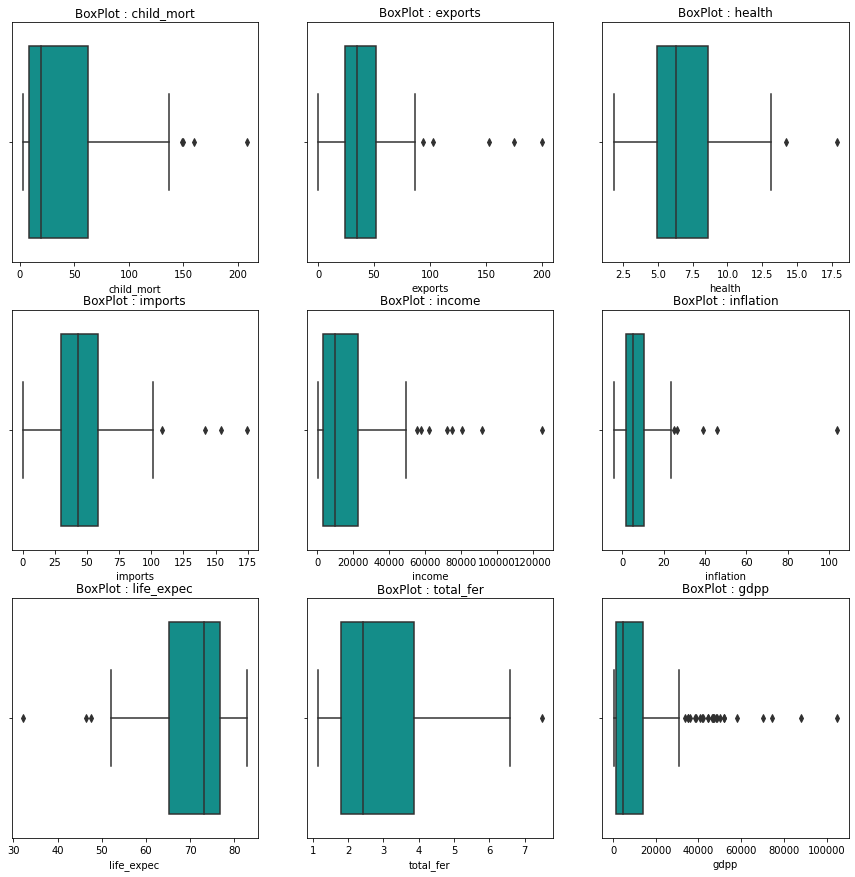

In [ ]:
# Sebaran data sebelum penggantian outlier dengan nilai mean
fig, ax = plt.subplots(nrows = 4,ncols = 4,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[numerical_features[i]],color = colors[0])
    title = 'BoxPlot : ' + numerical_features[i]
    plt.title(title)
plt.show()

In [ ]:
df = replace_outliers(df)
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.440000,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.490000,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.100000,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.400000,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.440000,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.620000,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,7.781832,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.100000,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.600000,67.5,4.67,1310


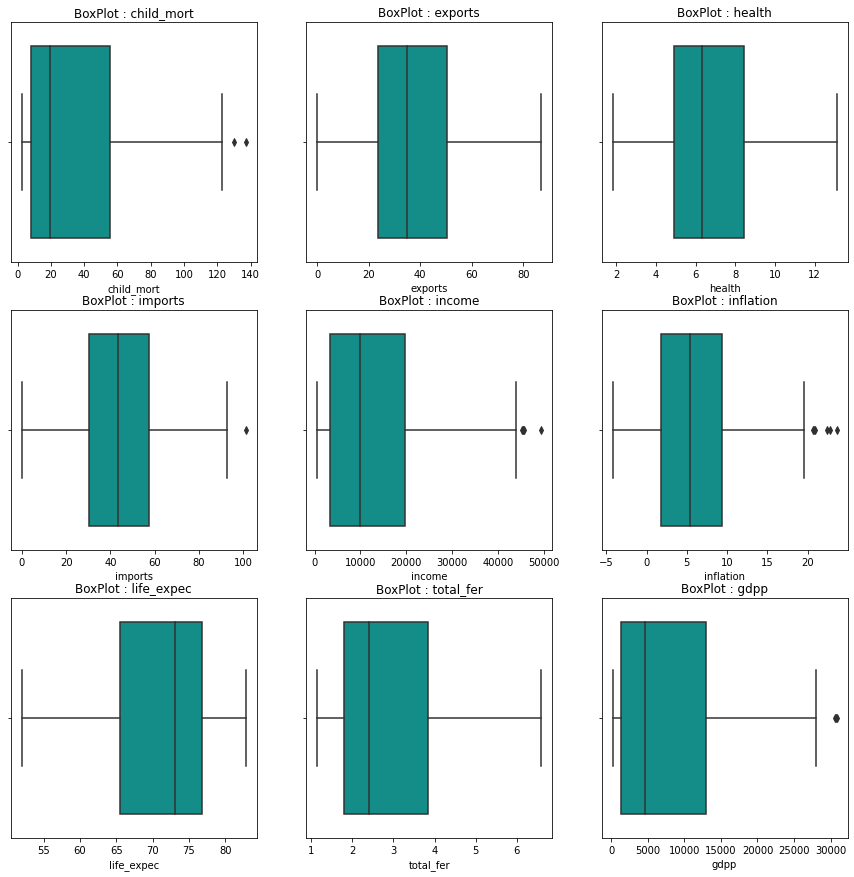

In [ ]:
# Sebaran data setelah penggantian outlier dengan nilai mean
fig, ax = plt.subplots(nrows = 4,ncols = 4,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[numerical_features[i]],color = colors[0])
    title = 'BoxPlot : ' + numerical_features[i]
    plt.title(title)
plt.show()

## **Normalisasi**

In [ ]:
def normalisasi(data):
  return (data - data.min()) / (data.max() - data.min())

df = normalisasi(df)
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.651786,0.113963,0.511072,0.444192,0.020516,0.490831,0.136364,0.858456,0.010534
1,0.104167,0.321358,0.419841,0.480849,0.191039,0.312837,0.788961,0.091912,0.126239
2,0.183780,0.441186,0.209035,0.310441,0.251911,0.730313,0.795455,0.319853,0.138343
3,0.866071,0.716560,0.092117,0.424377,0.108442,0.956850,0.262987,0.920956,0.107920
4,0.057292,0.522992,0.373782,0.582896,0.378984,0.203164,0.805195,0.180147,0.391540
...,...,...,...,...,...,...,...,...,...
162,0.197917,0.535666,0.304694,0.521470,0.047980,0.245595,0.357143,0.431985,0.089601
163,0.107887,0.327119,0.274579,0.173718,0.325695,0.431206,0.759740,0.242647,0.434067
164,0.154018,0.828323,0.445527,0.793925,0.079543,0.586480,0.685065,0.147059,0.035297
165,0.399554,0.344402,0.298494,0.340164,0.079338,1.000000,0.503247,0.647059,0.035297


# **[3] IMPLMENTASI K-MEANS**

## **Fungsi Dibutuhkan**

In [ ]:
# Manhattan Distance
def distance(data, centroid):
  jarak = 0
  for i in range(len(data)):
    jarak = jarak + abs(data[i]-centroid[i])
  return jarak

In [ ]:
def buat_centroid_awal(df):
# Membuat Centroid Awal
  random.seed(10)
  list_centroid = []
  centroid = []
  for i in range(3):
    for j in range(9):
      centroid.append(random.uniform(0,1))
    list_centroid.append(centroid)
    centroid = []
  return list_centroid

In [ ]:
def hitung_jarak_centroid(dataframe, list_centroid):
  # Menghitung Jarak Tiap Titik Ke Centroid
  list_jarak = []
  list_centroid_terpilih = []
  for i in range(len(dataframe)):
    data = list(dataframe.iloc[i])
    for j in range(len(list_centroid)):
      centroid = list_centroid[j]
      jarak = distance(data, centroid)
      list_jarak.append(jarak)
    centroid_terpilih = min(list_jarak)
    list_centroid_terpilih.append(list_jarak.index(centroid_terpilih))
    list_jarak = []
  return list_centroid_terpilih

In [ ]:
def buat_centroid_baru(dataframe, list_centroid_terpilih):
    #Update Centroid Baru
    list_index = []
    centroid = []
    new_list_centroid = []
    for cluster in range(3):
      # Mencari posisi data per cluster
      for index in range(len(list_centroid_terpilih)):
        titik = list_centroid_terpilih[index]
        if titik == cluster:
          list_index.append(index)
      
      # Menghitung mean
      first = True
      for selected in list_index:
        data = list(dataframe.iloc[selected])
        if first:
          jumlah  = data
          first   = False
        else:
          jumlah = [i+j for i,j in zip(jumlah, data)]

      pembagi = []
      for value in range(len(jumlah)):
        pembagi.append(len(list_index))

      centroid = [i/j for i, j in zip(jumlah, pembagi)]
      new_list_centroid.append(centroid)
      list_index = []
      centroid = []
    return new_list_centroid

## **Implementasi Final**

In [ ]:
centroid_awal = buat_centroid_awal(df)
list_centroid = centroid_awal
iterasi = 1
iterasi_max = 20

while iterasi <= iterasi_max:
  centroid_terpilih = hitung_jarak_centroid(df, list_centroid)
  new_centroid = buat_centroid_baru(df, centroid_terpilih)

  if new_centroid == list_centroid:
    break
  else:
    list_centroid = new_centroid
  iterasi += 1

print(list_centroid)
final_cluster = hitung_jarak_centroid(df, list_centroid)

[[0.03932005494505496, 0.5355500136472003, 0.5264368585170736, 0.4467312922117943, 0.5348675591179333, 0.2791912151135452, 0.8525974025974027, 0.1230769230769231, 0.4563874412740912], [0.20587798349436956, 0.4070339694887908, 0.37106054773955555, 0.4630591546008082, 0.15870334860870272, 0.43380707769387034, 0.5963441437329728, 0.26750843780135014, 0.11978973662914698], [0.6191220564098285, 0.3236091974243704, 0.3793773898766445, 0.39806172977243953, 0.05498015177729201, 0.49153269749080253, 0.2827491990994255, 0.7327293941528707, 0.04446478139419099]]


# **[4] EVALUASI HASIL**

In [ ]:
cluster = {"cluster": final_cluster}
cluster = pd.DataFrame(cluster)

df_final["cluster"] = cluster

In [ ]:
cluster0_country = []
cluster1_country = []
cluster2_country = []

for i in range(len(df_final)):
  if df_final["cluster"][i] == 0:
    cluster0_country.append(df_final["country"][i])
  elif df_final["cluster"][i] == 1:
    cluster1_country.append(df_final["country"][i])
  elif df_final["cluster"][i] == 2:
    cluster2_country.append(df_final["country"][i])

print("Negara Cluster 0 : ")
print(cluster0_country)
print("Negara Cluster 1 : ")
print(cluster1_country)
print("Negara Cluster 2 : ")
print(cluster2_country)
df_final

Negara Cluster 0 : 
['Antigua and Barbuda', 'Argentina', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Barbados', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Canada', 'Chile', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg', 'Malaysia', 'Maldives', 'Malta', 'Mauritius', 'Montenegro', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Panama', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Saudi Arabia', 'Seychelles', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Turkey', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay']
Negara Cluster 1 : 
['Albania', 'Algeria', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Botswana', 'Cambodia', 'Cape Verde', 'China', 'Colom

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2
